## Tutorial 1: Taxi Problem with Q-Learning

#### Tutorial by: Satwik Kansal and Brendan Martin
##### Link of tutorial: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [1]:
#Import the gym module
import gym

#Create the environment of Taxi v3
env = gym.make("Taxi-v3").env

#render the environment
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [2]:
env.reset() #reset the environment
env.render() #render the environment

print("Action Space {}".format(env.action_space))  #print action space
print("State Space {}".format(env.observation_space))  #print state space

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [3]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state) #print the current state illustration

env.s = state #set the environment state
env.render() #render the environment

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.P[328] #output the reward table of state 328

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [5]:
env.s = 328  #set the environment state

epochs = 0 #timesteps
penalties, reward = 0, 0 #penalties and rewards set to 0

frames = [] # for animation

done = False #preset done  to false for the loop

#loop until one passenger reaches the destination
while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1 #+1 to epochs
    
    
print("Timesteps taken: {}".format(epochs)) #number of timesteps printed
print("Penalties incurred: {}".format(penalties)) #number of penalties printed

Timesteps taken: 180
Penalties incurred: 65


In [6]:
from IPython.display import clear_output #import clear_output
from time import sleep #import sleep

#render each frame 
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 180
State: 0
Action: 5
Reward: 20


In [7]:
import numpy as np #import numpy
q_table = np.zeros([env.observation_space.n, env.action_space.n]) #intialise the q_table

In [8]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

alpha = 0.1 #set the learning rate factor
gamma = 0.6 #set discount factor
epsilon = 0.1 #set a value for random exploration

all_epochs = []
all_penalties = []

#loop 100000 times
for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    #loop until episode complete
    while not done:
        #favour finding new areas to explore
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        #if impossible move to learned values which is the best
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action) 
        
        #evaluating both values of old and new q values
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        #get new value
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        #deciding penalty
        if reward == -10:
            penalties += 1

        #move to next state and +1 on episode
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

Wall time: 31.8 s


In [9]:
q_table[328] #q table version of 328

array([ -2.41047965,  -2.27325184,  -2.41382393,  -2.36281956,
       -10.92023582, -10.08032691])

In [10]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0 #total number of timesteps and total value of penalties
episodes = 100

                                                                            #loop over the episodes
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

                                                                            #accumulate penalties
    total_penalties += penalties
                                                                            #total number of timesteps
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.2
Average penalties per episode: 0.0


## Tutorial 2: Cart-Pole Problem

#### Tutorial by: Kevin Frans
##### Link of tutorial: http://kvfrans.com/simple-algoritms-for-solving-cartpole/

### Hill Climbing Method

In [11]:
                                                                        #imported
import gym
import numpy as np
import matplotlib.pyplot as plt

                                                        #function that goes through an episode until the parameters are met
def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    counter = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        counter += 1
        if done:
            break
    return totalreward

                                                                    #training script to help the agent get the correct answer
def train(submit):
    env = gym.make('CartPole-v0')
    if submit:
        env.monitor.start('cartpole-hill/', force=True)
        
                                                                        #how many times to test before update occurs
    episodes_per_update = 5
                                                                        #how much of an update to place on the weights
    noise_scaling = 0.1
    parameters = np.random.rand(4) * 2 - 1
    bestreward = 0
    counter = 0

                                                                        #testing the run if it got better
    for _ in range(2000):
        counter += 1
        newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
        reward = run_episode(env,newparams)
        if reward > bestreward:
            bestreward = reward
            parameters = newparams
            if reward == 200:
                break

                
    if submit:
        for _ in range(100):
            run_episode(env,parameters)
        env.monitor.close()
    return counter


r = train(submit=False)
print (r)

2000


### Random Search Method

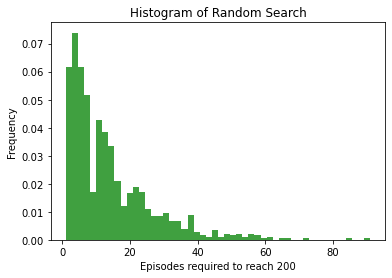

13.707


In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt

                                                                                #go through a single episode
def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward
                                                                                #training method to find the correct paramaters
def train(submit):
    env = gym.make('CartPole-v0')
    if submit:
        env.monitor.start('cartpole-experiments/', force=True)
                                                                                #method is to go through random variables
    counter = 0
    bestparams = None
    bestreward = 0
    for _ in range(10000):
        counter += 1
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break

    if submit:
        for _ in range(100):
            run_episode(env,bestparams)
        env.monitor.close()

    return counter

                                                                                #show histogram of performance
results = []
for _ in range(1000):
    results.append(train(submit=False))

plt.hist(results, 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print (np.sum(results) / 1000.0)

### Cart-Pole and Q-Learning

#### Code and tutorial by: Jose Nieves Flores Maynez
##### Link of tutorial: https://medium.com/@flomay/using-q-learning-to-solve-the-cartpole-balancing-problem-c0a7f47d3f9d

In [13]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
"""
Base code taken from: 
https://github.com/IsaacPatole/CartPole-v0-using-Q-learning-SARSA-and-DNN/blob/master/Qlearning_for_cartpole.py
"""

#creating an class to run for the cartpole
class CartPoleQAgent():
    
    #establishing the environment and the buckets to hold the variables in ranges for easier calculations (as it is continuous)
    def __init__(self, buckets=(3, 3, 6, 6), 
                 num_episodes=500, min_lr=0.1, 
                 min_epsilon=0.1, discount=1.0, decay=25):
        self.buckets = buckets
        self.num_episodes = num_episodes
        self.min_lr = min_lr
        self.min_epsilon = min_epsilon
        self.discount = discount
        self.decay = decay

        #make the environment
        self.env = gym.make('CartPole-v0')
        
        #setting up the q-table with 0's
        self.Q_table = np.zeros(self.buckets + (self.env.action_space.n,))

        # [position, velocity, angle, angular velocity]
        self.upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50) / 1.]
        self.lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50) / 1.]
        
        #
        self.steps = np.zeros(self.num_episodes)
        
        

    def discretize_state(self, obs):
        """
        Discretizing the variables, taking 4 vairables from obs to show the current state of the environment
        Using these variables will help create variables for the q-table
        
        Output:
        outputing a tuble in a discretized form
        """
        discretized = list()
        for i in range(len(obs)):
            scaling = ((obs[i] + abs(self.lower_bounds[i])) 
                       / (self.upper_bounds[i] - self.lower_bounds[i]))
            new_obs = int(round((self.buckets[i] - 1) * scaling))
            new_obs = min(self.buckets[i] - 1, max(0, new_obs))
            discretized.append(new_obs)
        return tuple(discretized)

    #implementing an algorithm of choice to allow the agent to choose between actions
    def choose_action(self, state):
        """
        Input the variables so the algorithm can choose between 0 - 1. This one is a greedy algorithm.
        """
        if (np.random.random() < self.epsilon):
            return self.env.action_space.sample() 
        else:
            return np.argmax(self.Q_table[state])
        
    def get_action(self, state, e):
        """                                 
        Another algorthm  that runs to achieve and get the actions needed. This one is based on the
        Q-table and assuming the the data has not been discretized.
        It will return a vector for possible actions to take.
        """
        obs = self.discretize_state(state)
        action_vector = self.Q_table[obs]
        epsilon = self.get_epsilon(e)
        action_vector = self.normalize(action_vector, epsilon)
        return action_vector

    def normalize(self, action_vector, epsilon):
        """   
        Getting a vector from the current q-table and return it.
        """
        
        total = sum(action_vector)
        new_vector = (1-epsilon)*action_vector/(total)
        new_vector += epsilon/2.0
        return new_vector

    def update_q(self, state, action, reward, new_state):
        """
        Updating the q-table and its values.
        """
        self.Q_table[state][action] += (self.learning_rate * 
                                        (reward 
                                         + self.discount * np.max(self.Q_table[new_state]) 
                                         - self.Q_table[state][action]))

    def get_epsilon(self, t):
        """Epsilon is the randomness factor ensuring that the agent chooses exploration over current action"""
        return max(self.min_epsilon, min(1., 1. - math.log10((t + 1) / self.decay)))

    def get_learning_rate(self, t):
        """Getting the learning rate, it is also alpha."""
        return max(self.min_lr, min(1., 1. - math.log10((t + 1) / self.decay)))

    def train(self):
        """
        A function that runs through the previous functions to update the q-table and train the agent to think better
        and run the program better. To achieve the best outcome, most of the time.
        """
        # Loop for episodes
        for e in range(self.num_episodes):
            
            current_state = self.discretize_state(self.env.reset())

            self.learning_rate = self.get_learning_rate(e)
            self.epsilon = self.get_epsilon(e)
            done = False
            
            # Loop for steps until done is satisfied
            while not done:
                self.steps[e] += 1
                
                #see action
                action = self.choose_action(current_state)
                
                #go with the action
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize_state(obs)
                
                # Update the q value
                self.update_q(current_state, action, reward, new_state)
                current_state = new_state
        print('Finished training!')
    
    def plot_learning(self):
        """
        Plotting the data of the learning so far
        """
        sns.lineplot(range(len(self.steps)),self.steps)
        plt.xlabel("Episode")
        plt.ylabel("Steps")
        plt.show()
        t = 0
        for i in range(self.num_episodes):
            if self.steps[i] == 200:
                t+=1
        print(t, "episodes were successfully completed.")
        

    def run(self):
        """Run the environment while displaying it, basically showing the user what it has done"""
        self.env = gym.wrappers.Monitor(self.env,'cartpole')
        t = 0
        done = False
        current_state = self.discretize_state(self.env.reset())
        while not done:
                self.env.render()
                t = t+1
                action = self.choose_action(current_state)
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize_state(obs)
                current_state = new_state
            
        return t

In [15]:
#function to run the agent and learning algorithm, aswell as plot the data
def load_q_learning():
    agent = CartPoleQAgent()
    agent.train()
    agent.plot_learning()

    return agent

Finished training!


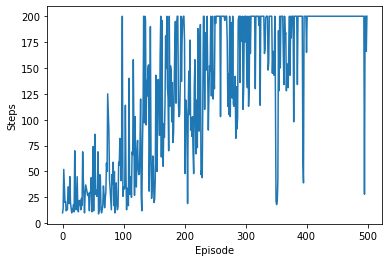

197 episodes were successfully completed.


In [16]:
#start the program
agent = load_q_learning()